                                STOCK PRICE PREDICTION

Introduction to Stock Price Prediction

Predicting stock prices has always been a subject of great interest for investors, financial analysts, and researchers. The ability to accurately forecast stock prices can lead to significant financial gains and a better understanding of market dynamics. Stock price prediction involves using historical data and various analytical techniques to estimate future stock prices. This project aims to leverage machine learning models to predict stock prices, providing a practical application of these techniques in the financial domain.

The stock market is influenced by numerous factors, including economic indicators, market sentiment, company performance, and geopolitical events. Traditional methods of stock price prediction, such as fundamental and technical analysis, rely heavily on historical data and expert knowledge. However, with the advent of machine learning, it has become possible to analyze vast amounts of data and uncover complex patterns that may not be apparent through traditional methods.

In this project, we will use historical stock data from Yahoo Finance to build and evaluate several machine learning models for predicting stock prices. The models to be used include Linear Regression, Lasso Regression, Support Vector Regression (SVR), and K-Nearest Neighbors (KNN). These models will be implemented from scratch, providing a deeper understanding of their underlying mechanics.

The project will involve the following steps:

Data Collection: Download historical stock data using the yfinance library.
Data Preprocessing: Prepare the data for modeling by scaling and splitting it into training and testing sets.
Model Implementation: Implement Linear Regression, Lasso Regression, SVR, and KNN models from scratch.
Model Training and Evaluation: Train the models on the training data and evaluate their performance using Mean Squared Error (MSE), accuracy, and precision metrics.
Visualization: Visualize the predicted stock prices and compare them with the actual prices to assess model performance.

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


Linear Regression

Theory: Linear regression aims to model the relationship between a dependent variable 
𝑦 and one or more independent variables X by fitting a linear equation to observed data.

FORMULA


y=β0  +β1X1 +β2 X2 +⋯+βn Xn +ϵ
where 𝛽0  is the intercept, 𝛽1,𝛽2,…,𝛽𝑛β 1 ,β2 ,…,βn  are the coefficients, and 
𝜖 is the error term.

LASSO REGRESSION




Lasso (Least Absolute Shrinkage and Selection Operator)
Theory: Lasso is a type of linear regression that uses L1 regularization to enforce sparsity. This means it can set some coefficients to zero, effectively performing variable selection.

Formula:

minβ (∑i=1 (yi −β0 −∑j=1(βj xij) )^2  +λ∑^p j=1( ∣ βj ∣))

where 𝜆 is the regularization parameter.







Support Vector Regression (SVR)




Theory: SVR is a type of Support Vector Machine (SVM) for regression. It attempts to find a function that deviates from the actual observed values by a value no greater than 
𝜖
ϵ and at the same time is as flat as possible.


Formula:

min𝑤,𝑏,𝜉,𝜉∗(1/2∥ 𝑤 ∥^2+𝐶∑^n 𝑖=1(𝜉𝑖+𝜉𝑖∗))

subject to:

𝑦𝑖−(𝑤⋅𝑥𝑖+𝑏)≤𝜖+𝜉𝑖yi

(w⋅xi +b)-yi≤ϵ+ξ*i​ 
 
𝜉𝑖,𝜉𝑖∗≥0

where w and 𝑏 are the parameters of the model, 𝜉𝑖𝜉i​  and 𝜉𝑖∗ξi∗​  are slack variables, 𝐶 is the regularization parameter, and 𝜖is the margin of tolerance.





k-Nearest Neighbors (k-NN)




Theory: k-NN is a non-parametric method used for classification and regression. In regression, the output is the average of the values of its k nearest neighbors.

Formula:
For a given point 
𝑥
𝑦^(𝑥)=1/𝑘∑𝑖∈𝑁𝑘(𝑥)𝑦𝑖

 
where 𝑁𝑘(𝑥) denotes the set of the k-nearest neighbors of 𝑥.

In [2]:
# Linear Regression
class LinearRegressionCustom:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add bias term
        self.coefficients = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add bias term
        return X_b.dot(self.coefficients)

# Support Vector Regression (SVR)
class SVRCustom:
    def __init__(self, epsilon=0.1, C=1.0):
        self.epsilon = epsilon
        self.C = C
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0.0
        # Very simplified gradient descent approach
        for _ in range(1000):
            for i in range(n_samples):
                error = y[i] - (np.dot(X[i], self.weights) + self.bias)
                if abs(error) > self.epsilon:
                    self.weights += self.C * error * X[i]
                    self.bias += self.C * error

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Lasso Regression
class LassoCustom:
    def __init__(self, alpha=1.0, iterations=1000, learning_rate=0.01):
        self.alpha = alpha
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.coefficients = None

    def fit(self, X, y):
        m, n = X.shape
        self.coefficients = np.zeros(n)
        for _ in range(self.iterations):
            y_pred = X.dot(self.coefficients)
            gradient = (-2 / m) * X.T.dot(y - y_pred) + self.alpha * np.sign(self.coefficients)
            self.coefficients -= self.learning_rate * gradient

    def predict(self, X):
        return X.dot(self.coefficients)

# K-Nearest Neighbors (KNN)
class KNNCustome:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = []
        for x in X:
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
            nearest_indices = distances.argsort()[:self.n_neighbors]
            nearest_labels = self.y_train[nearest_indices]
            y_pred.append(np.mean(nearest_labels))
        return np.array(y_pred)


LOADING AND PREPROCESSING OF DATA

In [3]:

# Load the stock data


def load_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    stock_data['Date'] = stock_data.index
    stock_data['Price'] = stock_data['Close']
    stock_data = stock_data[['Date', 'Price']]
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    stock_data.set_index('Date', inplace=True)
    stock_data['Next_Price'] = stock_data['Price'].shift(-1)
    stock_data.dropna(inplace=True)
    return stock_data


# Preprocess the data
def preprocess_data(stock_data):
    X = stock_data[['Price']].values
    y = stock_data['Next_Price'].values
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test, scaler


Accuracy
Theory: Accuracy is a metric used to evaluate the overall correctness of a classification model. It represents the proportion of true results (both true positives and true negatives) among the total number of cases examined.

Formula:
Accuracy=TP+TN/(TP+TN+FP+FN)

where:

TP = True Positives

TN = True Negatives

FP = False Positives

FN = False Negatives



Precision
Theory: Precision, also known as positive predictive value, measures the proportion of positive predictions that are actually correct. It is particularly useful in situations where the cost of false positives is high.

Formula:
Precision= TP/FP+TP
​
 
Visualization
Theory: Data visualization involves the graphical representation of data to help people understand and interpret it more effectively. Visualization can reveal patterns, trends, and insights that might not be obvious from raw data.

In [4]:
# Calculate Accuracy and Precision
def calculate_metrics(y_true, y_pred, tolerance=0.05):
    correct_predictions = np.abs(y_true - y_pred) <= (tolerance * y_true)
    accuracy = np.mean(correct_predictions) * 100  # Convert to percentage
    
    true_positives = np.sum((y_pred > 0) & (y_true > 0))
    predicted_positives = np.sum(y_pred > 0)
    precision = (true_positives / predicted_positives) * 100 if predicted_positives else 0  # Convert to percentage
    
    return accuracy, precision

# Evaluate the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    accuracy, precision = calculate_metrics(y_test, y_pred)
    return mse, y_pred, accuracy, precision

# Visualize the results
def visualize_results(stock_data, y_test, y_pred, title):
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data.index, stock_data['Price'], label='Historical Price')
    plt.plot(stock_data.index[-len(y_test):], y_test, label='Actual Price')
    plt.plot(stock_data.index[-len(y_test):], y_pred, label='Predicted Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(title)
    plt.legend()
    plt.show()


[*********************100%%**********************]  1 of 1 completed
C:\Users\sanja\AppData\Local\Temp\ipykernel_16012\3861034170.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])
C:\Users\sanja\AppData\Local\Temp\ipykernel_16012\3861034170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Next_Price'] = stock_data['Price'].shift(-1)
C:\Users\sanja\AppData\Local\Temp\ipykernel_16012\3861034170.py:12: SettingWithCopyWarning: 
A value is

LINEAR Model - Mean Squared Error: 6.118093152300871, Accuracy: 99.51%, Precision: 100.00%


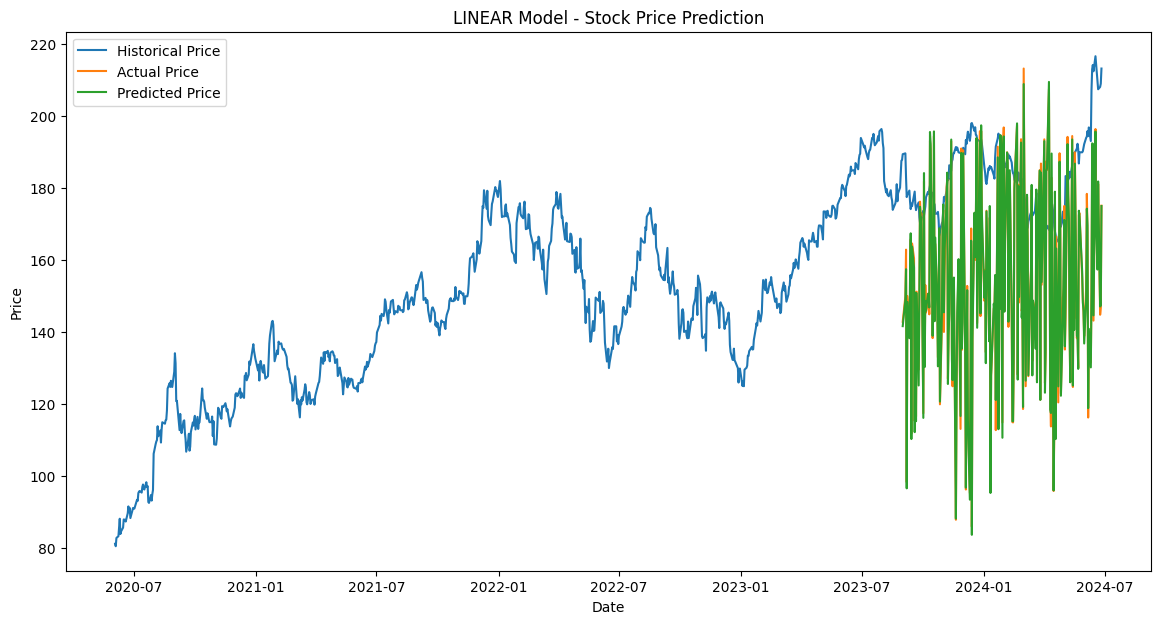

LASSO Model - Mean Squared Error: 804.3934481504467, Accuracy: 16.10%, Precision: 100.00%


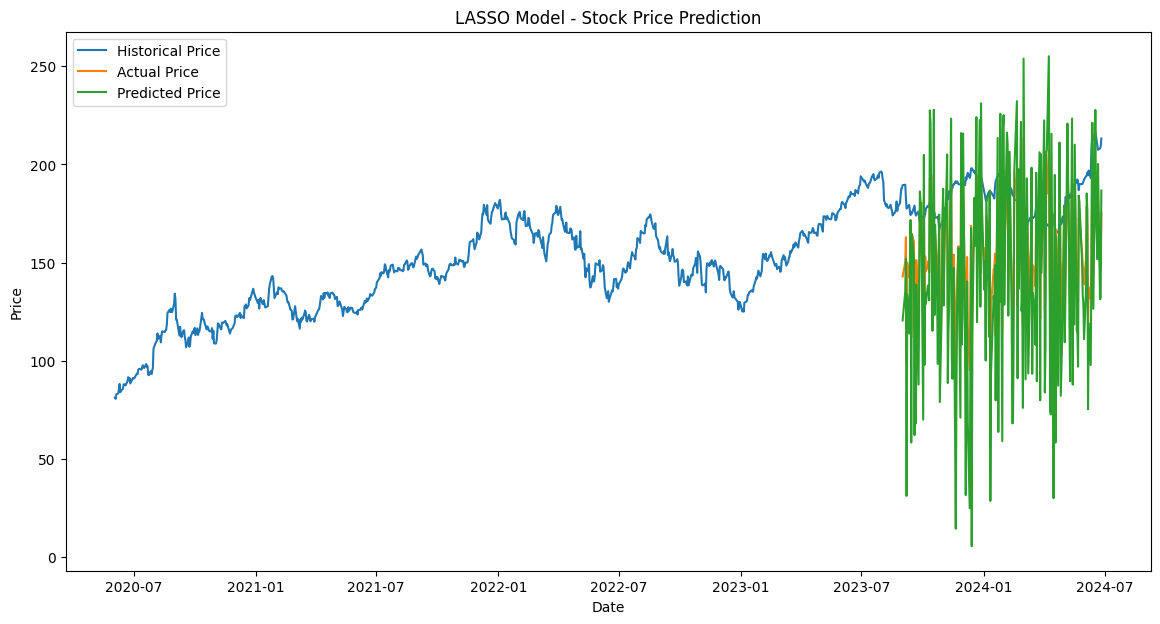

SVR Model - Mean Squared Error: 60.71834687154794, Accuracy: 55.61%, Precision: 100.00%


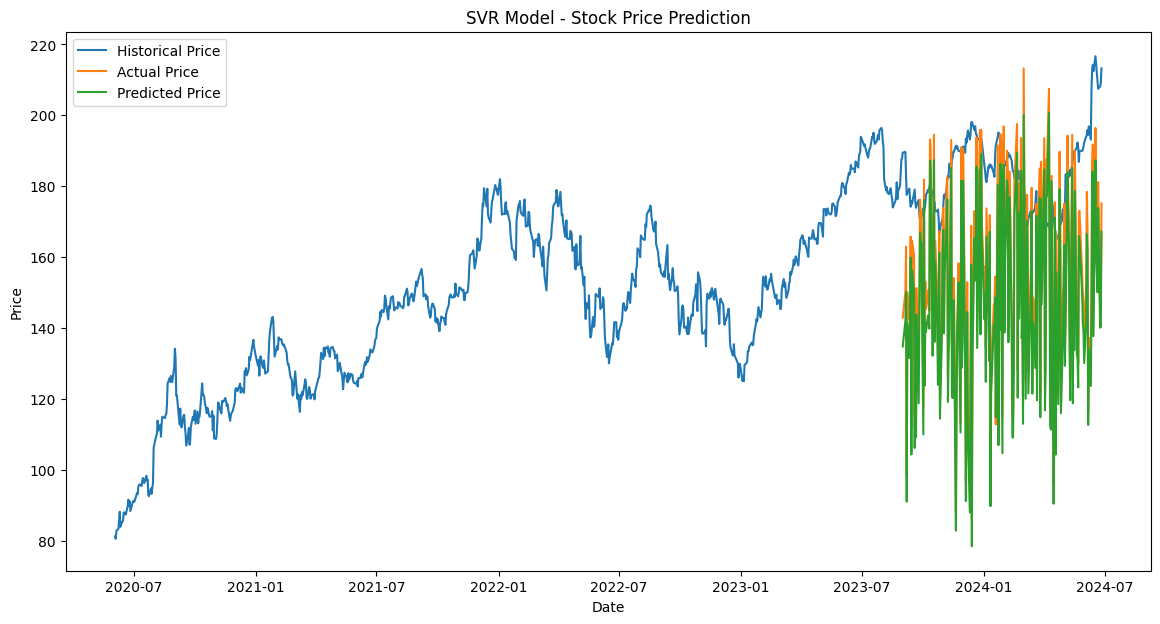

KNN Model - Mean Squared Error: 7.9813535982423085, Accuracy: 97.07%, Precision: 100.00%


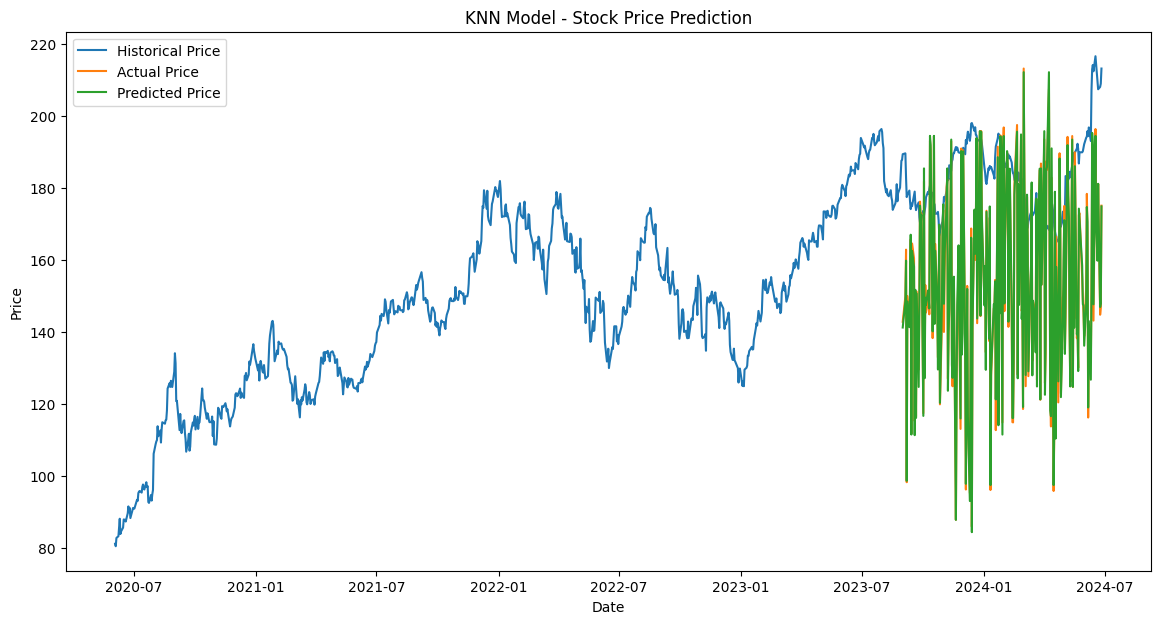

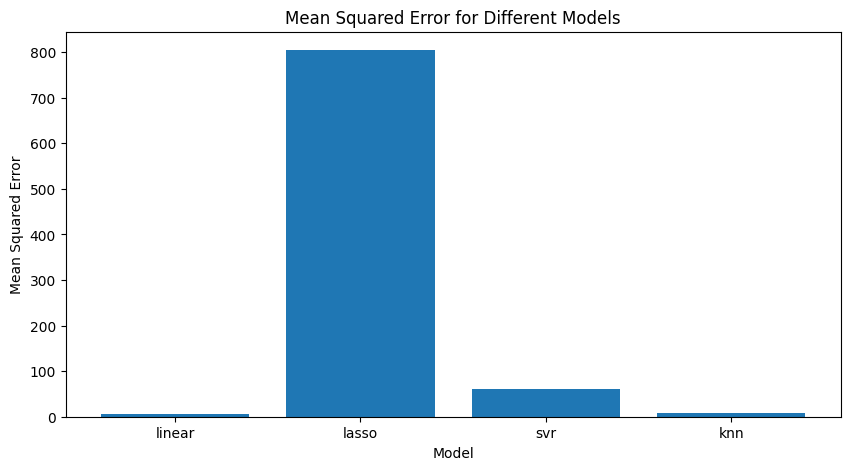

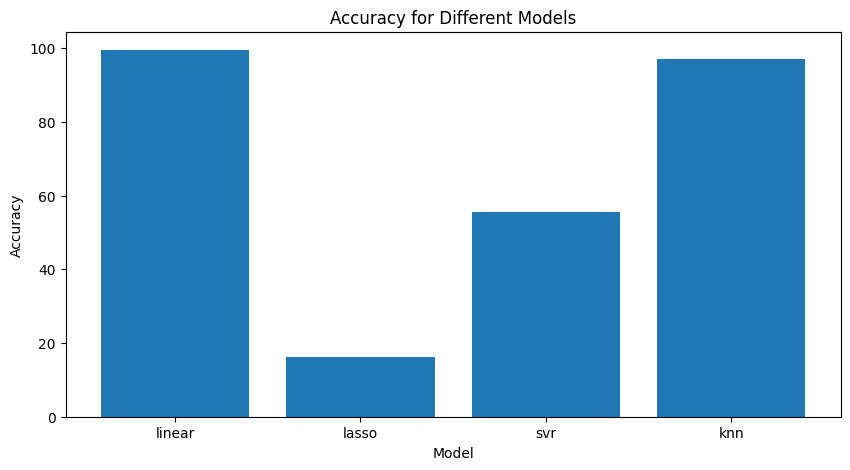

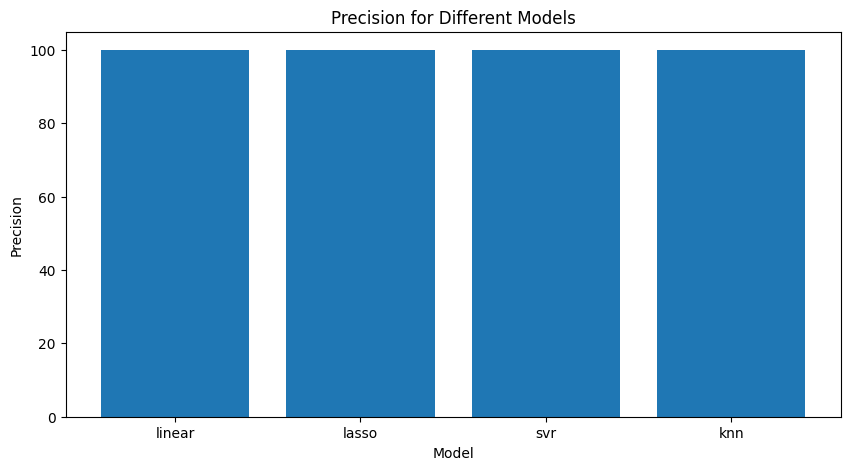

In [7]:
def main():
    ticker = 'AAPL'
    start_date = '2020-06-03'
    end_date = '2024-06-28'
    # file_path =r'C:\Users\sanja\OneDrive\Desktop\New folder (2)\AAPL.csv'
    # stock_data =load_data(file_path)
    
    stock_data = load_data(ticker, start_date, end_date)
    X_train, X_test, y_train, y_test, scaler = preprocess_data(stock_data)
    
    models = {
        'linear': LinearRegressionCustom(),
        'lasso': LassoCustom(alpha=0.1),
        'svr': SVRCustom(epsilon=0.1, C=1.0),
        'knn': KNNCustome(n_neighbors=5)
    }
    
    results = {}
    
    for model_type, model in models.items():
        model.fit(X_train, y_train)
        mse, y_pred, accuracy, precision = evaluate_model(model, X_test, y_test)
        results[model_type] = (mse, accuracy, precision)
        print(f'{model_type.upper()} Model - Mean Squared Error: {mse}, Accuracy: {accuracy:.2f}%, Precision: {precision:.2f}%')
        visualize_results(stock_data, y_test, y_pred, f'{model_type.upper()} Model - Stock Price Prediction')
    
    # Plot accuracy and precision
    plot_metrics(results)

def plot_metrics(results):
    metrics = ['Mean Squared Error', 'Accuracy', 'Precision']
    for metric in metrics:
        plt.figure(figsize=(10, 5))
        values = [results[model_type][metrics.index(metric)] for model_type in results]
        plt.bar(results.keys(), values)
        plt.title(f'{metric} for Different Models')
        plt.ylabel(metric)
        plt.xlabel('Model')
        plt.show()

if __name__ == '__main__':
    main()
